# ЛР №6

# Интерполяция таблично заданных функций

## В8

In [1]:
X = [0.015, 0.681, 1.342, 2.118, 2.671]
Y = [-2.417, -3.819, -0.642, 0.848, 2.815]

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from tabulate import tabulate

## 1
Построить интерполяционный многочлен Лагранжа. Вычислить $L_4(x_1+x_2)$. Построить график многочлена Лагранжа.

In [3]:
def lagrange(n: int):
    x = sp.Symbol('x')
    
    def p(i):
        res = reduce(lambda m, n: m * n, ((x - X[j])/(X[i] - X[j]) for j in range(len(X)) if i != j))   
        return res

    return sp.simplify(sum(p(i) * Y[i] for i in range(n)))

L(x) = 1.90509207775789*x**4 - 11.3492598999138*x**3 + 22.224309817125*x**2 - 12.8066138367673*x - 2.22986305485047
L4(x1 + x2) = -3.76365152635136


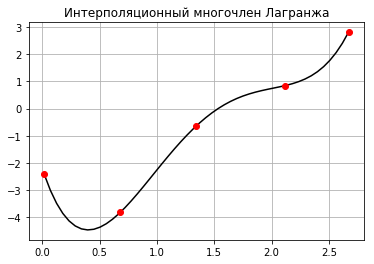

In [4]:
print('L(x) =', lagrange(len(X)))
print('L4(x1 + x2) =', lagrange(4).subs('x', X[0] + X[1]))

x_l = np.linspace(min(X), max(X), 50)
y_lag = [lagrange(len(X)).subs({'x': i}) for i in x_l]
plt.title("Интерполяционный многочлен Лагранжа")
plt.plot(x_l, y_lag, color='black')
plt.plot(X, Y, 'o', color='red')
plt.grid(True)
plt.show()

## 2
Построить таблицы конечных и разделенных разностей.

In [5]:
def finite_diffs():
    d = [['' for i in range(len(Y))] for j in range(len(Y))]
    d[0] = [i for i in Y]
    for i in range(1, len(Y)):
        for j in range(len(Y) - i):
            d[i][j] = d[i - 1][j + 1] - d[i - 1][j]
    return d

def divided_diffs():
    d = [['' for i in range(len(X))] for j in range(len(X))]
    d[0] = [i for i in Y]
    for i in range(1, len(Y)):
        for j in range(len(Y) - i):
            d[i][j] = (d[i - 1][j + 1] - d[i - 1][j]) / (X[j + i] - X[j])
    return d

In [6]:
f_diffs = finite_diffs()
f_diffs.insert(0, X)
table = [list(item) for item in zip(*f_diffs)]
print("\nКонечные разности\n")
print(tabulate(table, headers=['xk', 'yk', 'd1', 'd2', 'd3', 'd4'], tablefmt='fancy_grid'))


Конечные разности

╒═══════╤════════╤═════════════════════╤════════════════════╤════════════════════╤═══════════════════╕
│    xk │     yk │ d1                  │ d2                 │ d3                 │ d4                │
╞═══════╪════════╪═════════════════════╪════════════════════╪════════════════════╪═══════════════════╡
│ 0.015 │ -2.417 │ -1.4020000000000001 │ 4.579000000000001  │ -6.266000000000001 │ 8.430000000000001 │
├───────┼────────┼─────────────────────┼────────────────────┼────────────────────┼───────────────────┤
│ 0.681 │ -3.819 │ 3.177               │ -1.687             │ 2.164              │                   │
├───────┼────────┼─────────────────────┼────────────────────┼────────────────────┼───────────────────┤
│ 1.342 │ -0.642 │ 1.49                │ 0.4770000000000001 │                    │                   │
├───────┼────────┼─────────────────────┼────────────────────┼────────────────────┼───────────────────┤
│ 2.118 │  0.848 │ 1.967               │             

In [7]:
d_diffs = divided_diffs()
d_diffs.insert(0, X)
table = [list(item) for item in zip(*d_diffs)]
print("\nРазделенные разности\n")
print(tabulate(table, headers=['xk', 'yk', 'f1', 'f2', 'f3', 'f4'], tablefmt='fancy_grid'))


Разделенные разности

╒═══════╤════════╤════════════════════╤═════════════════════╤════════════════════╤═══════════════════╕
│    xk │     yk │ f1                 │ f2                  │ f3                 │ f4                │
╞═══════╪════════╪════════════════════╪═════════════════════╪════════════════════╪═══════════════════╡
│ 0.015 │ -2.417 │ -2.105105105105105 │ 5.208333921765079   │ -3.431697224752018 │ 1.905092077757894 │
├───────┼────────┼────────────────────┼─────────────────────┼────────────────────┼───────────────────┤
│ 0.681 │ -3.819 │ 4.806354009077156  │ -2.0085253418884137 │ 1.6282273337729478 │                   │
├───────┼────────┼────────────────────┼─────────────────────┼────────────────────┼───────────────────┤
│ 1.342 │ -0.642 │ 1.9201030927835057 │ 1.2316470523197525  │                    │                   │
├───────┼────────┼────────────────────┼─────────────────────┼────────────────────┼───────────────────┤
│ 2.118 │  0.848 │ 3.5569620253164564 │           

## 3
Построить полином Ньютона и вычислить значение $N_4(x_1+x_2)$. Построить график многочлена Ньютона.

In [8]:
def newton(n: int):
    x = sp.Symbol('x')
    diffs = divided_diffs()
    
    def gen():
        mul = 1
        for i in range(n):
            yield diffs[i][0] * mul   
            mul *= x - X[i] 
            
    return sp.simplify(reduce(lambda x, y: x + y, (i for i in gen())))

N(x) = 1.90509207775789*x**4 - 11.3492598999138*x**3 + 22.2243098171251*x**2 - 12.8066138367673*x - 2.22986305485047
N4(x1 + x2) = -3.77472805306630


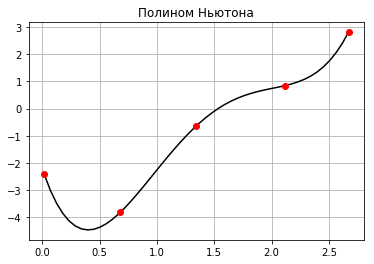

In [9]:
print('N(x) =', newton(len(X)))
print('N4(x1 + x2) =', newton(4).subs('x', X[0] + X[1]))

y_nw = [newton(len(X)).subs({'x': i}) for i in x_l]
plt.title("Полином Ньютона")
plt.plot(x_l, y_nw, color='black')
plt.plot(X, Y, 'o', color='red')
plt.grid(True)
plt.show()

## 4
Построить интерполяционные сплайны кусочно-линейный и кусочно-квадратичный. Построить графики сплайнов.

In [10]:
def linear_spline():
    x = sp.Symbol('x')
    l_splines = []
    
    for i in range(1, len(X)):
        res = Y[i-1] + (Y[i] - Y[i-1]) * (x - X[i-1]) / (X[i] - X[i-1])
        l_splines.append(sp.simplify(res))

    return l_splines

F(x) = -2.10510510510511*x - 2.38542342342342, 4.80635400907716*x - 7.09212708018154, 1.92010309278351*x - 3.21877835051546, 3.55696202531646*x - 6.68564556962026


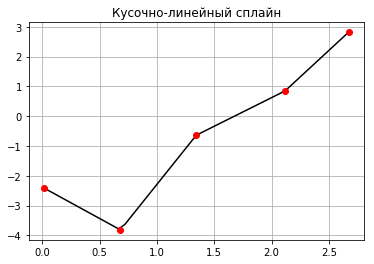

In [11]:
print('F(x) =', ', '.join(map(str, linear_spline())))

pre_y = linear_spline()
y_liner = []
for k in range(1, len(X)):
    y_liner.extend([pre_y[k-1].subs({'x': j}) for j in x_l if j <= X[k] and j >= X[k-1]])
    
plt.title("Кусочно-линейный сплайн")
plt.plot(x_l, y_liner, color='black')
plt.plot(X, Y, 'o', color='red')
plt.grid(True)
plt.show()

In [12]:
def qdr_spline():
    x = sp.Symbol('x')
    q_splines = []
    
    for i in range(2, len(X), 2):
        a2 = (Y[i] - Y[i - 2])/((X[i] - X[i - 2]) *
                                (X[i] - X[i - 1])) - \
                (Y[i - 1] - Y[i - 2])/((X[i - 1] - X[i - 2]) *
                                    (X[i] - X[i - 1]))

        a1 = (Y[i - 1] - Y[i - 2])/(X[i - 1] - X[i - 2]) - \
                a2 * (X[i - 1] + X[i - 2])

        a0 = Y[i - 2] - a1*X[i - 2] - a2*X[i - 2]**2

        q_splines.append(a0 + a1*x + a2*x**2)

    return q_splines

F(x) = 5.20833392176508*x**2 - 5.7301055146536*x - 2.33222029241259, 1.23164705231975*x**2 - 2.34139570824284*x + 0.282001038527899


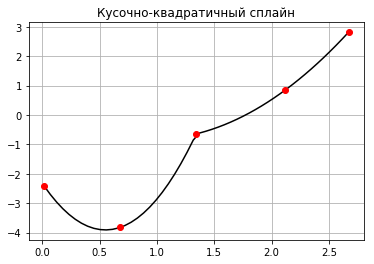

In [13]:
print('F(x) =', ', '.join(map(str, qdr_spline())))

pre_y = qdr_spline()
y_qdr = []
for m in x_l:
    for k in range(2, len(X), 2):
        if m <= X[k]:
            y_qdr.append(pre_y[k // 2 - 1].subs({'x': m}))
            break
        
plt.title("Кусочно-квадратичный сплайн")
plt.plot(x_l, y_qdr, color='black')
plt.plot(X, Y, 'o', color='red')
plt.grid(True)
plt.show()

## 5
Построить кубический интерполяционный сплайн. Построить график.

In [14]:
def cub_spline():
    x = sp.symbols('x')
    n = len(X) - 1
    c_h = [a - b for a, b in zip(X[1:], X[:-1])]
    c_l = [(a - b) / c for a, b, c in zip(Y[1:], Y[:-1], c_h)]
    alt_js = [-0.5 * c_h[1] / (c_h[0] + c_h[1])]
    lamds = [1.5 * (c_l[1] - c_l[0]) / (c_h[0] + c_h[1])]
    for i in range(2, n):
        alt_js.append(c_h[i] / (2 * c_h[i] + 2 * c_h[i - 1] + c_h[i - 1] * alt_js[i - 2]))
        lamds.append((2 * c_l[i] - 3 * c_l[i - 1] - c_h[i - 1] * lamds[i - 2]) / ((2 + alt_js[i - 2]) * c_h[i - 1] + 2 * c_h[i]))
    c_c = [0]
    for i in reversed(range(1, n)):
            c_c.append(alt_js[i - 1] * c_c[-1] + lamds[i - 1])
    c_c = list(reversed(c_c))
    c_b = [c_l[i] + (2 / 3) * c_c[i] * c_h[i] + (1 / 3) * c_h[i] * c_c[i - 1] for i in range(n)]
    c_a = list(Y[1:])
    c_d = [(c_c[i] - c_c[i - 1]) / (3 * c_h[i]) for i in range(n)]
    funcs = [sp.simplify(a + b * (x - xi) + c * (x - xi) ** 2 + d * (x - xi) ** 3)
            for a, b, c, d, xi in zip(c_a, c_b, c_c, c_d, X[1:])]
    return funcs

F(x) = 4.56179550017473*x**3 - 0.205280797507863*x**2 - 4.12543765801799*x - 2.3550876430101, -7.23249139580956*x**3 + 23.890447330988*x**2 - 20.5346285135237*x + 1.36979868118969, 3.11984733442532*x**3 - 17.7880683969376*x**2 + 34.9849721874692*x - 23.0965011932575, 3.93216175398262*x - 1.22690871971121*(x - 2.671)**3 - 7.68780404488759


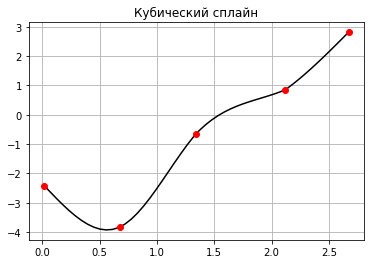

In [15]:
print('F(x) =', ', '.join(map(str, cub_spline())))
cub = cub_spline()

y_cub = []
for k in range(1, len(X)):
    y_cub.extend([cub[k-1].subs({'x': j}) for j in x_l if j <= X[k] and j >= X[k-1]])
plt.title("Кубический сплайн")
plt.plot(x_l, y_cub, color='black')
plt.plot(X, Y, 'o', color='red')
plt.grid(True)
plt.show()

## 6
На одном чертеже с графиком полиномов построить графики сплайнов.

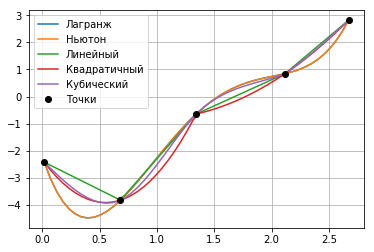

In [18]:
plt.plot(x_l, y_lag)
plt.plot(x_l, y_nw)
plt.plot(x_l, y_liner)
plt.plot(x_l, y_qdr)
plt.plot(x_l, y_cub)
plt.plot(X, Y, 'o', color='black')
plt.legend(['Лагранж', 'Ньютон', 'Линейный', 'Квадратичный', 'Кубический', 'Точки'])
plt.grid(True)
plt.show()